https://github.com/KacperBudnik/AiSD

# Zadanie 1

In [1]:
import types

# Z wykładu
class BinaryTree:
    def __init__(self,*items):
        self.count=1
        if len(items)==0:
            raise ValueError("Drzewko potrzebuje korzenia!")
            
        if type(items[0]) in (list, tuple): # jeśli podany jest kontener to wykonuje dla każdego elementu z osobna
            temp=BinaryTree(items[0][0])
            self.key=temp.key
            self.right=temp.right
            self.left=temp.left
            self.add(items[0][1:])
            
        elif type(items[0]) in (set, dict):
            item=list(items[0])
            temp=BinaryTree(item[0])
            self.key=temp.key
            self.right=temp.right
            self.left=temp.left
            self.add(item[1:])
            
        elif type(items[0]) == types.GeneratorType: # zadawanie przy użyciu generatora
            for item in items[0]:
                temp=BinaryTree(item)
                break
            self.key=temp.key
            self.left=temp.left
            self.right=temp.right
            self.add(items[0])
            
        elif type(items[0]) == range: # zadawanie przy użyciu range
            if len(items[0])>0: # na wypadek przykładowo range(0), brak elementu zerowego
                self.key=items[0][0]
                self.right=None
                self.left=None
                for i in items[0][1:]:
                    self.add(i)
                    
        elif type(items[0]) == BinaryTree: # Bo dlaczego nie
            self.key=items[0].key
            self.right=None
            self.left=None
            
            if items[0].right!=None:
                self.right=items[0].right.copy()
            if items[0].left!=None:
                self.left=items[0].left.copy()
        
        else:
            self.key = items[0]
            self.left = None
            self.right = None
        self.add(items[1:])
        
        
        
    def __insertLeft(self,newNode):
        if self.left == None:
            self.left = BinaryTree(newNode)
        else:
            temp = BinaryTree(newNode)
            temp.left = self.left
            self.left = temp
            
    def __insertRight(self,newNode):
        if self.right == None:
            self.right = BinaryTree(newNode)
        else:
            temp = BinaryTree(newNode)
            temp.right = self.right
            self.right = temp     
            
    def __getRightChild(self):
        return self.right

    def __getLeftChild(self):
        return self.left

    def __setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key    
    
############ Własne ##############
    
    def __repr__(self): # jakaś prezentacja wyników
        return str(self.key)+"->"+str([self.left,self.right])
                
    def add(self, *items):
        for item in items:
            if type(item) in (list, tuple,set,dict): # jeśli podany jest kontener to wykonuje dla każdego elementu z osobna
                self.add(*item) # dla słownika dodaję kluczę
                
            elif type(item) in (types.GeneratorType, range): # generatory lub range(x)
                for i in item:
                    self.add(i)
            
            elif type(item) == BinaryTree: # Bo dlaczego nie
                i=item.key
                temp=self
                while True: # wstawia całe drzewko w miejsce, gdzie powinien się znaleźć klucz dodany do drzewa
                    if temp.key<i:
                        if temp.left==None:
                            temp.left=item.copy()
                            break
                        else:
                            temp=temp.left
                    else:
                        if temp.right==None:
                            temp.right=item.copy()
                            break
                        else:
                            temp=temp.right        
            
            else:
                if item < self.key: # równe na prawo (jako większe)
                    if self.left == None:
                        self.left = BinaryTree(item)
                    else:
                        self.left.add(item)
                else:
                    if self.right == None:
                        self.right = BinaryTree(item)
                    else:
                        self.right.add(item)
    
    def __add__(self, item):
        temp=self.copy()
        temp.add(item)
        return temp
    
    def __sub__(self,item):
        return self+(-item)
    
    def copy(self):
        temp=BinaryTree(self.key)
        if self.left!=None:
            temp.left=self.left.copy()
            
        if self.right!=None:
            temp.right=self.right.copy()

        return temp
    
    def __contains__(self, item):
        if self.key < item:
            if self.right != None:
                return item in self.right
            else:
                return False
        elif self.key > item:
            if self.left != None:
                return item in self.left
            else:
                return False
        return True
    
    def __len__(self):
        return 1 + len(self.right if self.right != None else []) + len(self.left if self.left != None else [])
    
    def find_min(self): # zwraca najmniejszy
        if self.left != None:
            return self.left.find_min()
        elif self.right != None:
            return self.right.find_min()
        return self.key
    
    def find_max(self): # zwraca największy
        if self.right != None:
            return self.right.find_max()
        elif self.left != None:
            return self.left.find_max()
        return self.key
    
    def to_list(self): # zwraca _Posortowaną_ listę elementów
        lst=[]
        
        if self.left!= None:
            lst.extend(self.left.to_list())
            
        lst.append(self.key)
        
        if self.right!= None:
            lst.extend(self.right.to_list())
            
        return lst
    
    def __iter__(self):
        return BinaryTreeIterator(self)
    
    def erase(self, item):
        if not item in self:
            raise ValueErro("Nie ma takiego elementu")
        if self.key>item:
            if self.left.key == item:
                if self.count>1:
                    self.count-=1
                else:
                    temp=self.left
                    if temp.left == None:
                        if self.right == None:
                            self.left = None
                        else:
                            self.left = temp.right
                    else:
                        if temp.right = None:
                            self.
            else:   
                self.left.erase(item)
        elif self.key<item:
            self.right.erase(item)
    
    
class BinaryTreeIterator: # Do iterowania zadanego drzewa
    def __init__(self, tree:BinaryTree):
        self.val=tree.to_list()
        self.index=-1
        self.max=len(self.val)
        
    def __next__(self):
        self.index+=1
        if self.index<self.max:
            return self.val[self.index]
        raise StopIteration

Możliwość tworzenia od razu od listy elementów

In [136]:
a = BinaryTree([23,-15])

In [137]:
a

23->[-15->[None, None], None]

Nawet od list, która zawiera listę, która zawiera $\dots$
Albo od krotki, zbiorum, słownika, oraz po prostu wpisywanie elementów jeden za drugim jako kolejne argumenty funkcji

In [138]:
a = BinaryTree([{0,-1,32,2},{100},23,23],1,2,-2,[23],{-50})

In [139]:
a

0->[-1->[-2->[-50->[None, None], None], None], 32->[2->[1->[None, None], 23->[2->[None, None], 23->[None, 23->[None, None]]]], 100->[None, None]]]

In [140]:
a=BinaryTree([[([{0,0,0,0,0},23],3),5,6,7,8],-12,3,4,5],20,{2,3,4})

In [141]:
a

0->[-12->[None, None], 23->[3->[2->[None, None], 5->[3->[None, 4->[3->[None, None], 4->[None, None]]], 6->[5->[None, None], 7->[None, 8->[None, 20->[None, None]]]]]], None]]

In [148]:
a=BinaryTree(1,2)

In [149]:
a

1->[None, 2->[None, None]]

Oczywiście dodawanie elementów

In [150]:
a.add(-12)

In [151]:
a

1->[-12->[None, None], 2->[None, None]]

Oraz nawet dodawanie przy pomocy `+` (ale nie zmienia to samego drzewka, tak jak powinno być)

In [152]:
a=BinaryTree(1,2)

In [153]:
print(a+0)

1->[0->[None, None], 2->[None, None]]


In [154]:
a

1->[None, 2->[None, None]]

In [155]:
b=a+0

In [156]:
b

1->[0->[None, None], 2->[None, None]]

In [157]:
a

1->[None, 2->[None, None]]

In [158]:
b-=3

In [159]:
b

1->[0->[-3->[None, None], None], 2->[None, None]]

In [160]:
a

1->[None, 2->[None, None]]

Zmiany w `b` nie wpływają na `a`

Można jeszcze szukać elementów

In [161]:
1 in a

True

In [162]:
12 in a

False

Albo sprawdzić wielkość (ilość elementów) drzewa

In [163]:
len(a)

2

In [164]:
len(b)

4

In [165]:
b

1->[0->[-3->[None, None], None], 2->[None, None]]

In [166]:
len(b+2+3)

6

Oczywiście znajdować wartości skrajne

In [167]:
b.find_min()

-3

In [168]:
b.find_max()

2

In [169]:
(b+12).find_max()

12

In [170]:
(b-12).find_min()

-12

No i z danego drzewa tworzyć posortowaną listę

In [174]:
b=BinaryTree(1,2,23,23,2,31,3,12,3,123,3)

In [175]:
b+=[1,2,3,-5,23,-54,-1.2,32,4,4,7,7,6,5,4,3,-123,3-4,-34,2-2,4-5,5,-5,-3-23,-5]

In [176]:
b

1->[-5->[-54->[-123->[None, None], -34->[None, -26->[None, None]]], -1.2->[-5->[None, -5->[None, None]], -1->[None, 0->[-1->[None, None], None]]]], 2->[1->[None, None], 23->[2->[None, 3->[2->[None, None], 12->[3->[None, 3->[None, 3->[None, 4->[3->[None, None], 4->[None, 7->[6->[5->[4->[None, None], 5->[None, None]], None], 7->[None, None]]]]]]], None]]], 23->[None, 31->[23->[None, None], 123->[32->[None, None], None]]]]]]

In [177]:
b.to_list()

[-123,
 -54,
 -34,
 -26,
 -5,
 -5,
 -5,
 -1.2,
 -1,
 -1,
 0,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 6,
 7,
 7,
 12,
 23,
 23,
 23,
 31,
 32,
 123]

In [178]:
len(b)

36

In [179]:
len(b.to_list())

36

In [180]:
all(b.to_list()[i] in b for i in range(len(b)))

True

Zatem wszystkie elementy z listy znajdują się w drzewie (długość taka sama, więc są sobie równe)

Co ciekawse można iterować po drzewie

In [181]:
for i in b:
    print(i)

-123
-54
-34
-26
-5
-5
-5
-1.2
-1
-1
0
1
1
2
2
2
3
3
3
3
3
4
4
4
5
5
6
7
7
12
23
23
23
31
32
123


In [182]:
all(i in b.to_list() for i in b)

True

oraz tworzyć drzewa z iteratorów

In [187]:
from random import randint
a = BinaryTree(randint(-50,50) for i in range(50))

In [188]:
a

-7->[-44->[-48->[None, None], -25->[-29->[-30->[-37->[-40->[None, None], -34->[None, None]], None], -28->[None, -28->[None, None]]], -9->[-17->[-19->[-21->[-25->[None, -23->[None, None]], None], -18->[-19->[None, None], None]], -13->[None, -10->[None, None]]], -9->[None, None]]]], 47->[1->[-6->[-7->[None, None], -6->[None, -1->[-6->[None, None], None]]], 35->[33->[13->[7->[6->[None, None], 8->[7->[None, None], None]], 20->[16->[None, None], 31->[27->[23->[22->[None, None], 26->[None, 26->[None, None]]], None], 31->[None, None]]]], None], 42->[35->[None, None], 45->[None, 46->[None, None]]]]], 48->[None, None]]]

In [189]:
a = BinaryTree([12,3],( -i**2 for i in range(3)), [range(15)])

In [190]:
a

12->[3->[0->[-1->[-4->[None, None], None], 0->[None, 1->[None, 2->[None, None]]]], 3->[None, 4->[None, 5->[None, 6->[None, 7->[None, 8->[None, 9->[None, 10->[None, 11->[None, None]]]]]]]]]], 12->[None, 13->[None, 14->[None, None]]]]

In [191]:
a = BinaryTree(range(124))

In [192]:
a

0->[None, 1->[None, 2->[None, 3->[None, 4->[None, 5->[None, 6->[None, 7->[None, 8->[None, 9->[None, 10->[None, 11->[None, 12->[None, 13->[None, 14->[None, 15->[None, 16->[None, 17->[None, 18->[None, 19->[None, 20->[None, 21->[None, 22->[None, 23->[None, 24->[None, 25->[None, 26->[None, 27->[None, 28->[None, 29->[None, 30->[None, 31->[None, 32->[None, 33->[None, 34->[None, 35->[None, 36->[None, 37->[None, 38->[None, 39->[None, 40->[None, 41->[None, 42->[None, 43->[None, 44->[None, 45->[None, 46->[None, 47->[None, 48->[None, 49->[None, 50->[None, 51->[None, 52->[None, 53->[None, 54->[None, 55->[None, 56->[None, 57->[None, 58->[None, 59->[None, 60->[None, 61->[None, 62->[None, 63->[None, 64->[None, 65->[None, 66->[None, 67->[None, 68->[None, 69->[None, 70->[None, 71->[None, 72->[None, 73->[None, 74->[None, 75->[None, 76->[None, 77->[None, 78->[None, 79->[None, 80->[None, 81->[None, 82->[None, 83->[None, 84->[None, 85->[None, 86->[None, 87->[None, 88->[None, 89->[None, 90->[None, 91->[None

A nawet drzewa od drzew

In [196]:
a=BinaryTree(1,2,-3)

In [197]:
a

1->[-3->[None, None], 2->[None, None]]

In [198]:
b=BinaryTree(a)

In [199]:
b

1->[-3->[None, None], 2->[None, None]]

Nie mówiąc o towrzeniu kombinacji drzew z iteratorami i tym podobnymi

In [202]:
b=BinaryTree(a for i in [1,1,1]) # 3 razy a

In [203]:
b

1->[-3->[None, None], 2->[None, 1->[-3->[None, None], 2->[None, 1->[-3->[None, None], 2->[None, None]]]]]]

# Zadanie 2

In [204]:
import types
import numpy as np

class BinHeap:
    def __init__(self,*items): # skrócenie nazw + możliwość podania elementów kopca przy dodawaniu
        self.list = [0]
        self.size = 0
        self.add(*items)
        
    def percUp(self,i):
        while i // 2 > 0:
            if self.list[i] < self.list[i // 2]:
                tmp = self.list[i // 2]
                self.list[i // 2] = self.list[i]
                self.list[i] = tmp
            i = i // 2      
        
    def insert(self,k):
        self.list.append(k)
        self.size = self.size + 1
        self.percUp(self.size)        
        
    def findMin(self):
        if self.size==0:
            raise IndexError("Kopiec jest pusty")
        return self.list[1]

    def percDown(self,i):
        while (i * 2) <= self.size:
            mc = self.minChild(i)
            if self.list[i] > self.list[mc]:
                tmp = self.list[i]
                self.list[i] = self.list[mc]
                self.list[mc] = tmp
            i = mc

    def minChild(self,i):
        if i * 2 + 1 > self.size:
            return i * 2
        else:
            if self.list[i*2] < self.list[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1    
            
    def delMin(self):
        if self.size==0:
            raise IndexError("Kopiec jest pusty")
        retval = self.list[1]
        self.list[1] = self.list[self.size]
        self.size = self.size - 1
        self.list.pop()
        self.percDown(1)
        return retval           
    
    def buildHeap(self,alist): # już nie potrzebne (jest to _clear i dodanie po prostu listy)
        i = len(alist) // 2
        self.size = len(alist)
        self.list = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1    
            
    def size(self):
        return self.size
    
    def isEmpty(self):
        return self.size == 0
    
    def __str__(self):
        txt = "{}".format(self.list[1:])
        return txt
    
##################################################################
#                             Własne                             #
##################################################################

    def __repr__(self):
        return str(self.list[1:])
    
    def __len__(self):
        return self.size
    
    def add(self,*items): # by było można podawać wiele argumentów, wraz z kontenerami
        for item in items:
            if type(item) in (tuple, list):
                self.add(*item)
            elif type(item) in (dict, set):
                self.add(*list(item))
            elif type(item) == types.GeneratorType:
                for i in item:
                    self.add(i)
            elif isinstance(item, np.ndarray):
                item=list(item)
                self.add(item)
            else:
                self.insert(item)

    def _clear(self): # czyszczenie kopca (prywatna, by nie użyć przez przypadek)
        self.list=[0]
        self.size=0
    
    def sort(self):
        sortedList=[]
        s=self.size
        while self.size>0:
            sortedList.append(self.delMin())
        self.list=[0]+sortedList
        self.size=s

In [205]:
from random import randint
a=BinHeap(randint(-50,50) for i in range(31))

In [206]:
a

[-46, -39, -41, -33, -32, -27, -34, -33, -8, -32, -31, 16, -16, -13, 19, 50, 23, 43, 7, 38, -3, 41, 27, 39, 21, 37, 11, 38, 14, 43, 26]

In [207]:
a.sort()

In [208]:
a

[-46, -41, -39, -34, -33, -33, -32, -32, -31, -27, -16, -13, -8, -3, 7, 11, 14, 16, 19, 21, 23, 26, 27, 37, 38, 38, 39, 41, 43, 43, 50]

Co tu tłumaczyć, sortowanie przez kopcowanie

## Szybki test

In [209]:
from random import randint
import numpy as np

In [210]:
randint(-2**60,2**60)

-311579883951653978

In [211]:
np.random.randint(-2**32,2**32)

ValueError: low is out of bounds for int32

In [212]:
%%timeit
randint(-2**31,2**31)

827 ns ± 7.66 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [34]:
%%timeit
randint(-2**10,2**10)

764 ns ± 4.48 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [35]:
%%timeit
np.random.randint(-2**31,2**31)

2.58 µs ± 5.77 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
%%timeit
[randint(-2**31,2**31) for _ in range(2**10)]

881 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [37]:
%%timeit
np.random.randint(-2**31,2**31,2**10)

10.2 µs ± 57.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
%%timeit
np.random.randint(-2**31,2**31,2**15)

107 µs ± 602 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
%%timeit
np.random.randint(-2**31,2**31,2**20)

3.89 ms ± 40.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%%timeit
np.random.randint(-2**31,2**31,2**31)

8.41 s ± 863 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Losując pojedyńcze liczby tradycyjna bibliotego zwycięża, ale jeśli chcemy mieć listę liczb losowych to numpy nie ma sobie równych, ale nie możemy losować przy jego urzyciu liczb większych (i więcej liczb) niż 2**31

## Test właściwy

Poniżej pojawiają się powiadomienia o błędach. Są to przerwania wykonywania iteracji. Zrobiłem delikatny błąd rachunkowy i zamiast planowanego wykonania programu w ciągu 8 godzin, wykonywałby się ponad 24. Nie puszaczałem symulacji jeszcze raz, tylko ograniczyłem liczbę wyników to tych które zdążyły się wykonać

In [46]:
import time
import numpy as np
from random import randint

n=31
times=np.zeros(n+1)
numbers=np.random.randint(-2**n,2**n,2**n)

for i in range(n+1):
    a=BinHeap(numbers[:2**i])
    T=time.time()
    a.sort()
    times[i]=time.time()-T

KeyboardInterrupt: 

In [47]:
times

array([1.00350380e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00088120e-03,
       2.99978256e-03, 3.00002098e-03, 7.00163841e-03, 1.89836025e-02,
       3.20072174e-02, 7.10296631e-02, 1.63076878e-01, 3.38948488e-01,
       7.46915102e-01, 1.66279936e+00, 3.68977952e+00, 7.81150126e+00,
       1.69718349e+01, 3.62357903e+01, 7.84339437e+01, 1.68431542e+02,
       3.64554195e+02, 7.74962467e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [48]:
import time
import numpy as np
from random import randint

n=31-2 #szacowany czas ostatniego 5-5.7h
n=31-3 # szacowany czas ostatniego 2.3h
Tim=np.zeros(n+1)
numbers=np.random.randint(-2**n,2**n,2**n)

for i in range(n+1):
    a=BinHeap(numbers[:2**i])
    T=time.time()
    a.sort()
    Tim[i]=time.time()-T

KeyboardInterrupt: 

In [49]:
Tim

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00040436e-03,
       9.99927521e-04, 3.00073624e-03, 6.00147247e-03, 1.50039196e-02,
       3.60085964e-02, 7.40170479e-02, 1.59030199e-01, 3.48716497e-01,
       7.71439791e-01, 1.65170741e+00, 3.59301019e+00, 7.75503492e+00,
       1.69674728e+01, 3.60844564e+01, 7.80425515e+01, 1.67152969e+02,
       3.60247869e+02, 7.79478208e+02, 1.67020568e+03, 0.00000000e+00,
       0.00000000e+00])

In [51]:
import matplotlib.pyplot as plt

In [59]:
y=times[:26]
x=range(26)

Poniżej jest wykres czasu wykonania funkcji (na czerwono). Jeśli porównamy z wykresem funkcji $n\ln n$ (na niebiesko) to zauważymym, że obie funkcjie niemal dokładnie się pokrywają, nasza (czerwona) jest delikatni niżej, ponieważ w zależnośći od przypadku liczba wykonujemy mniej iteracji (tak jak można było się domyślać). Oczywiście oś niebieska i czerwona się różnią, ale różnica miedzy jedną a drugą to "stała czasowa" (na niebiesko ile zrobiliśmy iteracji, na czerwono jaki czas trwały. czerwony = niebieski * "stała").

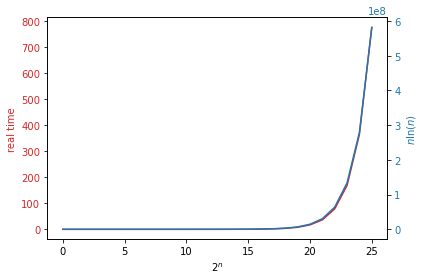

In [62]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('$2^n$')
ax1.set_ylabel('real time', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$n\ln(n)$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, [2**i*np.log(2**i) for i in x], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [68]:
y=Tim[:-2] # dwa ostatnie nie dały rady się zrobić
x=range(len(Tim[:-2]))

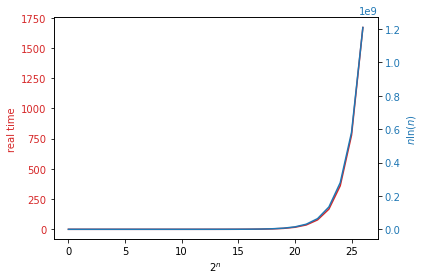

In [71]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('$2^n$')
ax1.set_ylabel('real time', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$n\ln(n)$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, [2**i*np.log(2**i) for i in x], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Z wykresów możemy odczytać, że złożoność obliczeniowe jest rzędu $O(n\ln n)$

# Zadanie 3

Jest to BinHeap z zmodyfikowanym jedynie konstruktorem oraz metodą insert

In [215]:
import types
import numpy as np

class BinHeapN:
    def __init__(self,n:int,*items): # n - maksymalna wielkość kopca
        if type(n) is not int or not n >0:
            raise ValueError("Maksymalna wielkość musi być liczbą naturalną (>0)")
        self.max_size=n
        self.list = [0]
        self.size = 0
        self.add(*items)
        
    def percUp(self,i):
        while i // 2 > 0:
            if self.list[i] < self.list[i // 2]:
                tmp = self.list[i // 2]
                self.list[i // 2] = self.list[i]
                self.list[i] = tmp
            i = i // 2      
        
    def insert(self,k):
        self.list.append(k)
        self.size = self.size + 1
        if self.size<=self.max_size: # jeśli wielkość jest mniejsza niż maksymalna
            self.percUp(self.size)    
        else: 
            if k>self.findMin(): # robi coś jeśli dodajemy element większy (mniejszy od razu jest usuwany)
                self.percUp(self.size) 
                self.delMin()
            else:
                self.list.pop() # jeśli nowy jest najmniejszy do go usuwamy (dodany na końcu i jeszcze nie przesunięty)
        
    def findMin(self):
        if self.size==0:
            raise IndexError("Kopiec jest pusty")
        return self.list[1]

    def percDown(self,i):
        while (i * 2) <= self.size:
            mc = self.minChild(i)
            if self.list[i] > self.list[mc]:
                tmp = self.list[i]
                self.list[i] = self.list[mc]
                self.list[mc] = tmp
            i = mc

    def minChild(self,i):
        if i * 2 + 1 > self.size:
            return i * 2
        else:
            if self.list[i*2] < self.list[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1    
            
    def delMin(self):
        if self.size==0:
            raise IndexError("Kopiec jest pusty")
        retval = self.list[1]
        self.list[1] = self.list[self.size]
        self.size = self.size - 1
        self.list.pop()
        self.percDown(1)
        return retval           
    
    def buildHeap(self,alist):
        i = len(alist) // 2
        self.size = len(alist)
        self.list = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1    
            
    def size(self):
        return self.size
    
    def isEmpty(self):
        return self.size == 0
    
    def __str__(self):
        txt = "{}".format(self.list[1:])
        return txt
    
##################################################################
#                             Własne                             #
##################################################################

    "nie zmienione w stosunku do BinHeap"

    def __repr__(self):
        return str(self.list[1:])
    
    def __len__(self):
        return self.size
    
    def add(self,*items):
        for item in items:
            if type(item) in (tuple, list):
                self.add(*item)
            elif type(item) in (dict, set):
                self.add(*list(item))
            elif type(item) == types.GeneratorType:
                for i in item:
                    self.add(i)
            elif isinstance(item, np.ndarray):
                item=list(item)
                self.add(item)
            else:
                self.insert(item)

    def _clear(self):
        self.list=[0]
        self.size=0
    
    def sort(self):
        sortedList=[]
        s=self.size
        while self.size>0:
            sortedList.append(self.delMin())
        self.list=[0]+sortedList
        self.size=s

In [216]:
a=BinHeapN(5,[2,3,2])

In [217]:
a

[2, 3, 2]

In [218]:
a.add(12,12)

In [219]:
a

[2, 3, 2, 12, 12]

In [220]:
a.add(3)

In [221]:
a

[2, 3, 3, 12, 12]

In [222]:
a.add(5)

In [223]:
a

[3, 3, 5, 12, 12]

In [224]:
a #niezmienione bo 2<3

[3, 3, 5, 12, 12]

# Zadanie 4

Funkcja:
- `derivate` pobiera wyrażenie matematyczne, łączy wszystkie inne funkcjie i zwraca drzewo wyrażenia matematycznego (`MathTree`).
- `derivate_to_latex` działa podobnie jak poprzednia, ale pobiera od razu zmienną po której ma różniczkować i zwraca wynik
- `prepare` zagnieżdża wyrażenia jedno w drugim ("wstawia nawiasy", ustala, że np. mnożenie robimy przed dodawaniem)
- `correct` decyduje o kolejności działań w obrębie działań równoważnych (np. dla $a\cdot b\cdot c$ ustala, które mnożenie pierwsze

In [2]:
def derivate(txt): # zwraca drzewko matematyczne
    txt=txt.replace(" ", "")
    txt=txt.replace("**", "^")
    txt=txt.replace("\\", "/")
    txt=txt.replace(":", "/")
    txt=txt.replace("arc", "a")
    
    tree=MathTree(*prepare(txt))
    return tree

def derivate_to_latex(txt,variable):
    txt=txt.replace(" ", "")
    txt=txt.replace("**", "^")
    txt=txt.replace("\\", "/")
    txt=txt.replace(":", "/")
    txt=txt.replace("arc", "a")
    
    tree=MathTree(*prepare(txt))
    return "$$"+tree.derivate_to_latex(variable)+"$$" # zwraca pochodną w latexu

def correct(equation,lvl=4):
    # lvl - który operator rozpatrujemy (dzielenie przed mnożenim, odejmowanie przed dodawaniem)
    operators=["+","-","*","/","^"]
    if operators[lvl] in ("^",):
        reverse=True
    else:
        reverse=False
    
    for i in range(len(equation))[::(-1)**reverse]:
        if equation[i] == operators[lvl]:
            return correct(equation[:i-1]+[equation[i-1:i+2]]+equation[i+2:],lvl=lvl)
        
    if lvl>0:
        return correct(equation,lvl=lvl-1)
    return equation # Jeśli są działania równie ważne (np a*b*c), to wyznacza kolejność działania

def prepare(txt): # Wyznacza kolejność działań itp.
    function=[
        [],
        [],
        ["ln"],
        ["log","pow","exp","sin","cos","tan","cot","sec"],
        ["sqrt","log2","asin","acos","atan","acot","sinh","cosh","tanh","coth","sech"],
        ["log10"],
        ["cosech"]
    ]

    operators=["+","-","*","/","^"]#,"'"]

    unknown=False
    res=[]
    l=len(txt)
    i=0
    while i<l:
        if txt[i]=="(":
            par=0
            j=i
            while True:
                if txt[j]=="(":
                    par+=1

                if txt[j]==")":
                    par-=1

                if par==0:
                    break
                j+=1
            res.append(prepare(txt[i+1:j]))
            i=j
            unnown=True

        elif txt[i:i+6] in function[6]:
            j=i+6
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+6],prepare(txt[i+6+1:j])])
                i=j
            else:
                res.append([txt[i:i+6],txt[i+6]])
            unnown=True

        elif txt[i:i+5] in function[5]:
            #res.append(txt[i:i+5])
            j=i+5
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+5],prepare(txt[i+5+1:j])])
                i=j
            else:
                res.append([txt[i:i+5],txt[i+5]])
            unnown=True

        elif txt[i:i+4] in function[4]:
            j=i+4
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+4],prepare(txt[i+4+1:j])])
                i=j
            else:
                res.append([txt[i:i+4],txt[i+4]])
            unnown=True

        elif txt[i:i+3] in function[3]:
            #res.append(txt[i:i+3])
            j=i+3
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+3],prepare(txt[i+3+1:j])])
                i=j
            else:
                res.append([txt[i:i+3],txt[i+3]])
            unnown=True

        elif txt[i:i+2] in function[2]:
            #res.append(txt[i:i+2])
            j=i+2
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+2],prepare(txt[i+2+1:j])])
                i=j
            else:
                res.append([txt[i:i+2],txt[i+2]])
            unnown=True

        elif txt[i] in operators:
            res.append(txt[i])
            unknown=False
            
        else:
            if txt[i].isnumeric():
                j=1
                while txt[i:i+j+1].isnumeric() and j<l:
                    j+=1
                if unknown:
                    res.append('*')
                res.append(txt[i:i+j])
                i+=j-1
            else:
                if unknown:
                    res.append("*")
                res.append(txt[i])
            unknown=True



        i+=1    
    res=correct(res)
        
    return res

Classa `MathTree`, tu się dzieje cała magia. Pobiera wyrażenie matematyczne przygotowane przez funkcjie `prepare`. Takie wyrażenie jest to lista, która zawiera od 1 do 3 elementów. 
 - Jeśli zawiera 1, to jest to zmienna, stała, albo liczba, z którą nic więcej nie robimy.
 - Przy 2 elementach otrzymujemy funkcjię. Pierwszy element to sama funkcja, drugi natomiast to jej argument. Argument jest zapisywany w lewej gałęzi
 - Może zawierać jeszcze 3 elementy. Wtedy dostajemy działanie na dwóch wyrażeniach. Pierwszy i trzeci to owe wyrażenia, środkowy to działanie między nimi. (Przykładowo $2^3$ daje `['2','^','3']`)
 
Classa ta zawiera dwie metody
 - `__repr__` to wyświetlajnia wyrażenia, oraz zwracania wyniku (w kodzie $\LaTeX$)
 - `derivare_to_latex` która zawiera całe mięsko i na niej się skupię

Metoda ta pobiera zmienną po której chcemy różniczkować (jeśli jest ich za dużo, lub za mało zwraca błąd). Lista `function` zawiera listę obsługiwanych funkcji matematycznych, posegregowaną w listach wedługi długości ich nazw. Poniżej jest funkcja różniczkująca. Szuka operacji którą mamy wykonać i zwraca jej pochodną.<br>
Metoda może różniczkować szeroką klasę funkcji (przykładowo $f(x)^{g(x)}$), ale przezto wyniki nie zawsze są w najprostszej postaci (nie skraca ich).<br>
Przykładowo dla
$$ f(x)=x^2,$$<br>
funkcjia zwróci wynik, w którym każda działanie oraz liczba będzie w nawiasach, które po opuszczeniu wygląda następująco<br><br>
$$ f'(x)=x^2\cdot\left(2\cdot\dfrac{1}{x}+\ln x\cdot 0\right) $$<br>
Wynik jest poprawny, natomiast nie skrócony (no można się przyczepić co dla $x<=0$).

In [107]:
class MathTree:
    
    def __init__(self, equation):
        self.key=None
        self.left=None
        self.right=None
        if len(equation)==1 or type(equation)==str:
            while type(equation) is list and len(equation) == 1:
                equation=equation[0]

            if type(equation) is list:
                if len(equation)==2:
                    self.key=equation[0]
                    self.left=equation[1]
                else:
                    self.key=equation[1]
                    self.left=equation[0]
                    self.right=equation[2]
            else:
                self.key=equation
            
        elif len(equation)==2:
            self.key=equation[0]
            while type(equation[1]) is list and len(equation[1]) == 1:
                equation[1]=equation[1][0]
            self.left=MathTree(equation[1])
            
        elif len(equation)==3:
            self.key=equation[1]
            self.left=MathTree(equation[0])
            self.right=MathTree(equation[2])
            
    def __repr__(self):
        if self.right==None:
            if self.left==None:
                return self.key
            else:
                return self.key+r"\left("+str(self.left)+r"\right)"
        else:
            return r"\left("+str(self.left)+r"\right)" + self.key +r"\left("+str(self.right)+r"\right)"

        
    def derivate_to_latex(self,variable):
        if len(variable)!=1 or variable.isnumeric():
            raise ValueError("Błędna zmienna")
            
        function=[
            [],
            [],
            ["ln"],
            ["log","pow","exp","sin","cos","tan","cot","sec","csch"],
            ["sqrt","log2","asin","acos","atan","acot","sinh","cosh","tanh","coth","sech"],
            ["log10"],
            []#["cosech"]
        ]
        
        
        
        if self.key in ("+","-"):
            return self.left.derivate_to_latex(variable) + self.key + self.right.derivate_to_latex(variable)
        
        elif self.key=="*":
            return self.left.derivate_to_latex(variable)+r"\cdot "+str(self.right)+r"+"+str(self.left)+r"\cdot "+self.right.derivate_to_latex(variable)
        
        elif self.key=="/":
            return r"\dfrac{\left(\left("+self.left.derivate_to_latex(variable)+r"\right)\cdot \left("+str(self.right)+r"\right)\right) - \left(\left("+str(self.left)+r"\right)\cdot \left("+self.right.derivate_to_latex(variable)+"\right)\right)}{\left("+str(self.right)+"\right)^2}"
        
        elif self.key=="^":
            return r"\left("+str(self.left)+r"\right)^{\left("+str(self.right)+r"\right)}\cdot \left(\left("+str(self.right)+r"\right)\cdot \dfrac{\left("+self.left.derivate_to_latex(variable)+r"\right)}{\left("+str(self.left)+r"\right)}+\ln\left("+str(self.left)+r"\right)\cdot \left("+self.right.derivate_to_latex(variable)+r"\right)\right)"
        
        else:
            if self.key=="ln":
                return r"\dfrac{"+self.left.derivate_to_latex(variable)+r"}{"+str(self.left)+r"}"
            elif self.key=="log":
                return r"\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\left("+str(self.left)+r"\right)\cdot \ln 10}"
            elif self.key=="log2":
                return r"\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\left("+str(self.left)+r"\right)\cdot \ln 2}"
            elif self.key=="exp":
                return r"e^{"+str(self.left)+r"}\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="sin":
                return r"\cos\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="cos":
                return r"-\sin\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="tan":
                return r"\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\cos\left("+str(self.left)+r"\right)}"
            elif self.key=="cot":
                return r"-\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\sin\left("+str(self.left)+r"\right)}"
            elif self.key=="sec":
                return r"\sec\left("+str(self.left)+r"\right)\cdot \tan\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="csc":
                return r"-\csc\left("+str(self.left)+r"\right)\cdot \cot\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="sqrt":
                return r"\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\sqrt{}"+str(self.left)+r"}}"
            elif self.key=="asin":
                return r"\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\sqrt{1-\left("+str(self.left)+r"\right)^2}}"
            elif self.key=="acos":
                return r"-\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\sqrt{1-\left("+str(self.left)+r"\right)^2}}"
            elif self.key=="":
                return r"\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\left("+str(self.left)+r"\right)^2+1}"
            elif self.key=="":
                return r"-\dfrac{"+self.left.derivate_to_latex(variable)+r"}{\left("+str(self.left)+r"\right)^2+1}"
            elif self.key=="sinh":
                return r"\cosh\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="cosh":
                return r"\sinh\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="tanh":
                return r"\sech\left("+str(self.left)+r"\right)^2\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="coth":
                return r"-\csch\left("+str(self.left)+r"\right)^2\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="sech":
                return r"-\sech\left("+str(self.left)+r"\right)\cdot \tanh\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="":
                return r"-\sech\left("+str(self.left)+r"\right)\cdot \tanh\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="csch":
                return r"-\csch\left("+str(self.left)+r"\right)\cdot \coth\left("+str(self.left)+r"\right)\cdot \left("+self.left.derivate_to_latex(variable)+r"\right)"
            elif self.key=="":
                return
            elif self.key=="":
                return
            
            if self.key==variable:
                return r"1"
            else:
                return r"0"


W przykładach kożystałem z rozszerzenia jupytera `Python Markdown`, które pozwala uzywać zmiennych jupytera (pythona) w markdown'ie. Przykładowo

In [23]:
a=derivate_to_latex("x^2","x")
print(a)

$$\left(x\right)^{\left(2\right)}\cdot \left(\left(2\right)\cdot \dfrac{\left(1\right)}{\left(x\right)}+\ln\left(x\right)\cdot \left(0\right)\right)$$


Zamiast przekopiować powyższy kod wystarczy dać `{ {a} }` (użyłem teraz spacji by rozszerzenie nie działało), by otrzymać poniższy wynik

{{a}}

<b>Uwaga!</b>
By dane rozszerzenie działało notatnik musi być zaufany, oraz niestety nie ma możliwości wyeksportować pliku z poniższymi wynikami.

Przykłądy innych pochodnych

In [32]:
a=derivate_to_latex("x^x","x")

{{a}}

In [33]:
a=derivate_to_latex("cos(x)^(sin(x)+x^2)","x")

{{a}}

In [34]:
a=derivate_to_latex("ax^2+bx+c-12","x")

Działą z parametrami
{{a}}

In [35]:
a=derivate_to_latex("ax^2+bx+c-12","a")

Nieważne jakie wybierzemy (przykładowo a)
{{a}}

In [31]:
a=derivate_to_latex("ax^2+bx+c-12","1")

ValueError: Błędna zmienna

Po liczbie nie działa

Może bardziej skomplikowany przykład

In [110]:
a=derivate_to_latex("23x","x")

Można ominąć znaki mnożeni
{{a}}

In [121]:
a=derivate_to_latex("sin(x)^cos(x)^x",'x')

{{a}}